<a href="https://colab.research.google.com/github/Br0d0brey/GoogleColabFiles/blob/main/ConvoluntionalNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def showImages(images):
    fig, axes = plt.subplots(1, 5, figsize=(30, 30))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
train_url = 'https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip'
test_url = 'https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip'
image_size = 300
input_shape = (image_size, image_size, 3)
batch_size = 50

In [ ]:
train_dir = tf.keras.utils.get_file('horse-or-human.zip', origin=train_url, extract=True)
test_dir = tf.keras.utils.get_file('validation-horse-or-human.zip', origin=test_url, extract=True)
print(f'train_dir = {train_dir}')
print(f'test_dir = {test_dir}')
print(f'full train_dir = {os.path.dirname(train_dir)}')
print(f'full test_dir = {os.path.dirname(test_dir)}')

11493376/11480187 [==============================] - 1s 0us/step
train_dir = /root/.keras/datasets/horse-or-human.zip
test_dir = /root/.keras/datasets/validation-horse-or-human.zip
full train_dir = /root/.keras/datasets
full test_dir = /root/.keras/datasets


In [ ]:
all_horses_dir = os.path.join(os.path.dirname(train_dir), "horses")
all_humans_dir = os.path.join(os.path.dirname(train_dir), "humans")
full_train_dir = os.path.join(os.path.dirname(train_dir), "train")
full_test_dir = os.path.join(os.path.dirname(test_dir), "test")
train_humans_dir = os.path.join(full_train_dir, "train_humans")
train_horses_dir = os.path.join(full_train_dir, "train_horses")
test_humans_dir = os.path.join(full_test_dir, "test_humans")
test_horses_dir = os.path.join(full_test_dir, "test_horses")
os.mkdir(full_train_dir)
os.mkdir(full_test_dir)
os.mkdir(train_humans_dir)
os.mkdir(train_horses_dir)
os.mkdir(test_humans_dir)
os.mkdir(test_horses_dir)
src_humans = os.listdir(all_humans_dir)
src_horses = os.listdir(all_horses_dir)
for human_filename in src_humans:
  if human_filename.find('val') == 0:
    shutil.copy(os.path.join(all_humans_dir, human_filename), test_humans_dir)
  else:
    shutil.copy(os.path.join(all_humans_dir, human_filename), train_humans_dir)
for horse_filename in src_horses:
  if horse_filename.find('-') == 6:
    shutil.copy(os.path.join(all_horses_dir, horse_filename), test_horses_dir)
  else:
    shutil.copy(os.path.join(all_horses_dir, horse_filename), train_horses_dir)
total_train_humans = len(os.listdir(train_humans_dir))
total_test_humans = len(os.listdir(test_humans_dir))
total_train_horses = len(os.listdir(train_horses_dir))
total_test_horses = len(os.listdir(test_horses_dir))
total_train = total_train_humans + total_train_horses
total_test = total_test_humans + total_test_horses
print(f'total_train_humans = {total_train_humans}')
print(f'total_test_humans = {total_test_humans}')
print(f'total_train_horses = {total_train_horses}')
print(f'total_test_horses = {total_test_horses}')
print(f'total_train = {total_train}')
print(f'total_test = {total_test}')

total_train_humans = 527
total_test_humans = 128
total_train_horses = 500
total_test_horses = 128
total_train = 1027
total_test = 256


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


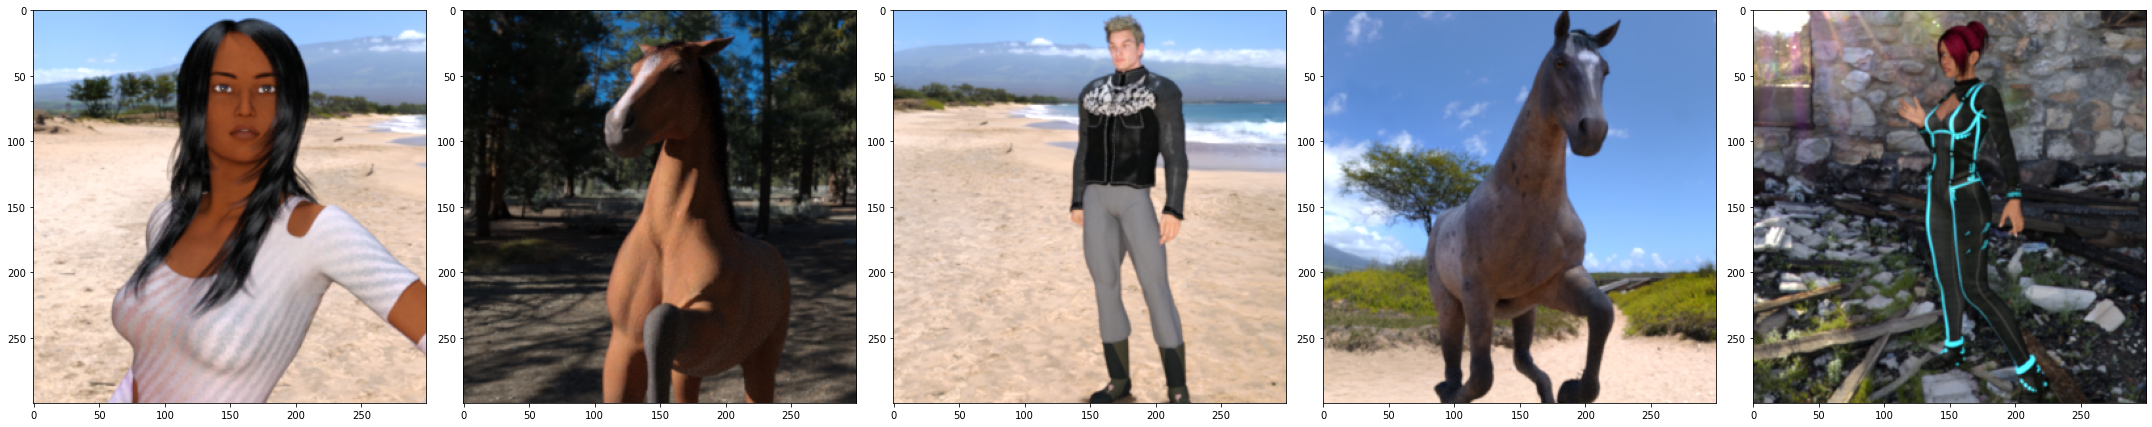

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=full_train_dir,
                                                           shuffle=True,
                                                           target_size=(image_size, image_size),
                                                           class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                         directory=full_test_dir,
                                                         shuffle=False,
                                                         target_size=(image_size, image_size),
                                                         class_mode='binary')
samples, _ = next(train_data_gen)
showImages(samples[:5])

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()
epochs = 10
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=int(np.ceil(total_test / float(batch_size)))
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
21/21 [==============================] - 133s 6s/step - loss: 0.5585 - accuracy: 0.7157 - val_loss: 1.2987 - val_accuracy: 0.6562
Epoch 2/10
21/21 [==============================] - 131s 6s/step - loss: 0.2154 - accuracy: 0.9114 - val_loss: 0.6131 - val_accuracy: 0.8555
Epoch 3/10
21/21 [==============================] - 131s 6s/step - loss: 0.1007 - accuracy: 0.9581 - val_loss: 1.1964 - val_accuracy: 0.8242
Epoch 4/10
21/21 [==============================] - 130s 6s/step - loss: 0.0853 - accuracy: 0.9747 - val_loss: 0.9357 - val_accuracy: 0.8477
Epoch 5/10
21/21 [==============================] - 130s 6s/step - loss: 0.0305 - accuracy: 0.9883 - val_loss: 2.7254 - val_accuracy: 0.7969
Epoch 6/10
21/21 [==============================] - 130s 6s/step - loss: 0.0157 - accuracy: 0.9961 - val_loss: 2.4288 - val_accuracy: 0.7617
Epoch 7/10
21/21 [==============================] - 130s 6s/step - loss: 0.0088 - accuracy: 0.9990 - val_loss: 2.8764 - val_accuracy: 0.7656
Epoch 8/10
21

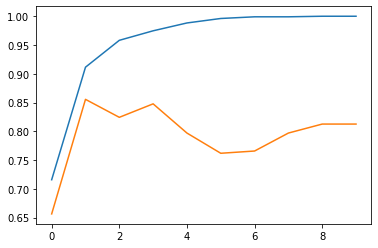

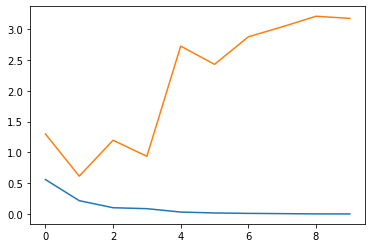

In [ ]:
accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
loss = history.history['loss']
test_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure()
plt.plot(epochs_range, accuracy, label='Train Accuracy')
plt.plot(epochs_range, test_accuracy, label='Test Accuracy')
plt.show()
plt.figure()
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, test_loss, label='Test Loss')
plt.show()

In [ ]:
shutil.rmtree(full_train_dir)
shutil.rmtree(full_test_dir)